# Analyzing CTRM data

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
a = np.load("../projects/ctrm_project/lolbla.npy")
da = np.load("../projects/ctrm_project/lolbla_deltas.npy")

In [5]:
! ls ../projects/ctrm_project/

lolbla_deltas.npy  lolbla.npy  makets.f  point_passiv_dif.f  sesmogram


In [6]:
a.shape, da.shape

((6692280, 5), (833280, 6))

In [7]:
a

array([[ 30.        , -40.        ,   1.        ,   0.        ,
          0.31864092],
       [ 30.        , -40.        ,   1.        ,   1.        ,
          0.30247223],
       [ 30.        , -40.        ,   1.        ,   2.        ,
          0.29012138],
       ...,
       [ 60.        ,   1.        ,  39.        , 254.        ,
          0.        ],
       [ 60.        ,   1.        ,  39.        , 255.        ,
          0.        ],
       [ 60.        ,   1.        ,  39.        , 256.        ,
          0.        ]], dtype=float32)

## False data

As we still don't have our data ready yet, we'll use a fabricated dataset to check the size compatibility of our network

We'll have the data stored in a numpy array, taking the shape: $(i_{batch}, x, y, z, t)$

In [33]:
data_fab = np.random.rand(8, 100, 35, 70, 70) * 2 - 1

# The network

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv3D, Input, MaxPool3D, Flatten
from tensorflow.keras.layers import TimeDistributed, LSTM
# import cv2
import skimage

## Constructing a test layer

We'll start by looking at  $32 \times 64^2$ one frame at a time. The first input dimension indicates time, the next 3 are for the frame sizes, and the last one is the color channel (only 1).

In [35]:
lay_input = Input(shape=(None, 32, 64, 64, 1))

Before we can proceed with this input layer, we have to standardize the size of our data, since not all of our images match this input shape.

In [36]:
############### Prepprocessing here ################









In [37]:
data_fab.shape

(8, 100, 35, 70, 70)

In [64]:
ix, iy, iz = np.meshgrid(np.arange(data_cur.shape[1]), 
                         np.arange(data_cur.shape[2]), 
                         np.arange(data_cur.shape[0]))
c, ix, iy, iz = data_cur.ravel(), ix.ravel(), iy.ravel(), iz.ravel()
print(c.shape, ix.shape, iy.shape, iz.shape)
c, ix, iy, iz

(171500,) (171500,) (171500,) (171500,)


(array([0.58694333, 0.10302546, 0.0477567 , ..., 0.6827501 , 0.45292139,
        0.44740598]),
 array([ 0,  0,  0, ..., 69, 69, 69]),
 array([ 0,  0,  0, ..., 69, 69, 69]),
 array([ 0,  1,  2, ..., 32, 33, 34]))

In [50]:
data_cur[None,None,:].size, data_cur.size, data_cur[None,None,:].shape

(171500, 171500, (1, 1, 35, 70, 70))

In [70]:
data_cur.size

171500

In [94]:
def flatten_matrix(mat):
    """
    flatten a matrix by returning a value, index pair represantation
    :param mat: a numpy matrix to flatten
    :return: a list of form: val, i_0, i_1, ...
    """
    n_dim = len(mat.shape)
    s = mat.size
    
    v_ranges = []
    for d in range(n_dim):
        v_ranges.append(np.arange(mat.shape[d]))
        
    indexes = np.meshgrid(*v_ranges)
    res = [mat.ravel()]
    for ran in indexes:
        res.append(ran.ravel())
        
    for i, vec in enumerate(res):
        assert vec.size == s , f"dim mismatch, index num {i} is of size {vec.size} and not {s}"
    return res

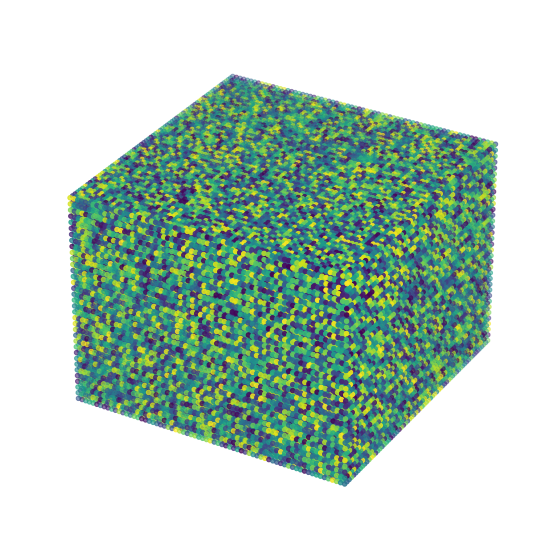

In [96]:
from mpl_toolkits.mplot3d import Axes3D
# Change the Size of Graph using
# Figsize
fig = plt.figure(figsize=(10, 10))
 
# Generating a 3D sine wave
ax = plt.axes(projection='3d')
 
# To create a scatter graph
i = 0
t = 0
data_cur = data_fab[i, t, :, :, :]
c, iz, ix, iy = flatten_matrix(data_cur)
ax.scatter(ix, iy, iz ,c=c)
 
# trun off/on axis
plt.axis('off')
 
# show the graph
plt.show()

We'll construct a prototype network with an input layer, 2 image processing layers (convolutional layers), and an LSTM layer to handle time.

This network will serve as a proof of concept to test how it handles 3D video input, and to see if convolutional RNN networks give as viable results.

After doing some testing with RNNs, we'll test time handling with transformers, and we'll compare the results.

In [41]:
lay_con3dt_sub1 = TimeDistributed(Conv3D(16, 3))
lay_con3dt_sub2 = TimeDistributed(MaxPool3D(3))
lay_con3dt = lay_con3dt_sub2(lay_con3dt_sub1)

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [45]:
lay_con3dt_sub1.output_shape()

AttributeError: The layer has never been called and thus has no defined output shape.

In [32]:
model = lay_con3dt(lay_input)
model = lay_con3dt(model)

ValueError: Input 0 of layer conv3d_6 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 30, 62, 62, 16)

In [ ]:
!  conda install -c conda-forge opencv -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for boto anaconda:  44%|▍| 161/368 [1:15:04<29:05,  8.43s/it- 

In [ ]:
import cv2